<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузим-библиотеки-и-импортируем-функции" data-toc-modified-id="Загрузим-библиотеки-и-импортируем-функции-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузим библиотеки и импортируем функции</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-ознакомление-с-таблицей" data-toc-modified-id="Загрузка-и-ознакомление-с-таблицей-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Загрузка и ознакомление с таблицей</a></span></li></ul></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Изучим-значения-количества-заказов-в-общем" data-toc-modified-id="Изучим-значения-количества-заказов-в-общем-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучим значения количества заказов в общем</a></span></li><li><span><a href="#Построим-график-по-всем-значениям." data-toc-modified-id="Построим-график-по-всем-значениям.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Построим график по всем значениям.</a></span></li><li><span><a href="#Посмотрим-на-тренды-и-сезонность:" data-toc-modified-id="Посмотрим-на-тренды-и-сезонность:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Посмотрим на тренды и сезонность:</a></span></li><li><span><a href="#Изучим-изменения-в-соседних-значениях" data-toc-modified-id="Изучим-изменения-в-соседних-значениях-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Изучим изменения в соседних значениях</a></span></li><li><span><a href="#Создадим-признаков-для-обучения-модели" data-toc-modified-id="Создадим-признаков-для-обучения-модели-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Создадим признаков для обучения модели</a></span></li><li><span><a href="#Выводы-по-этапу:" data-toc-modified-id="Выводы-по-этапу:-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Выводы по этапу:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-регрессии" data-toc-modified-id="Дерево-регрессии-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дерево регрессии</a></span></li><li><span><a href="#Выводы-по-этапу:" data-toc-modified-id="Выводы-по-этапу:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы по этапу:</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

## Подготовка

### Загрузим библиотеки и импортируем функции

In [1]:
pip install lightgbm -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade scikit-learn -q 

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install optuna -q

In [4]:
pip install phik -q

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install shap -q

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from math import sqrt

from phik import phik_matrix
from phik.report import plot_correlation_matrix

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, \
                                    cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, \
                                  MinMaxScaler, RobustScaler, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer 
from sklearn.metrics import roc_auc_score, f1_score, fbeta_score, make_scorer, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.base import clone

import shap

from optuna.integration import OptunaSearchCV 
from optuna import distributions
import optuna

import lightgbm as lgb

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings

RANDOM_STATE = 42

### Предобработка данных

#### Загрузка и ознакомление с таблицей

In [7]:
df = pd.read_csv('/datasets/taxi.csv')
df.head(20)

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
5,2018-03-01 00:50:00,21
6,2018-03-01 01:00:00,7
7,2018-03-01 01:10:00,5
8,2018-03-01 01:20:00,17
9,2018-03-01 01:30:00,12


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


меняем первый столбец на формат даты и времени

In [9]:
df['datetime'] = df['datetime'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


Сделаем время индексом и отсортируем

In [10]:
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Реемплируем по часу

In [11]:
df = df.resample('1H').sum()
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [13]:
df.index.min()

Timestamp('2018-03-01 00:00:00', freq='H')

In [14]:
df.index.max()

Timestamp('2018-08-31 23:00:00', freq='H')

У нас данные с первого марта по тридцать первое августа 2018 года

Подготовка данных закончена, проведем анализ

## Анализ

### Изучим значения количества заказов в общем

In [15]:
df.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


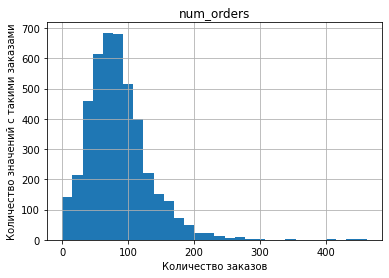

In [16]:
df.hist(bins=30)
plt.ylabel('Количество значений с такими заказами')
plt.xlabel('Количество заказов')
plt.show();

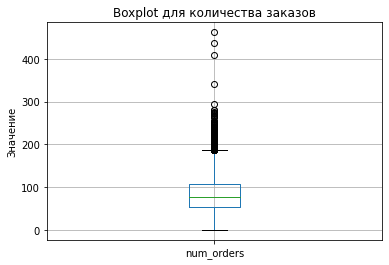

In [17]:
plt.title(f'Boxplot для количества заказов')
df.boxplot()
plt.ylabel('Значение')
plt.show();

Мы видим что у нас были часы, когда было 0 закаов, а было и по 462. По боксплоту значения выше приблизительно 190 это выбросы. Но на самом деле мы не можем удалить их.

Все таки это не аномалии, а реальные значения и мы должны учитвать в предсказании что такие высокие значения могут иногда встречаться. Поэтому оставим датафрейм без изменений.

### Построим график по всем значениям.

<AxesSubplot:xlabel='datetime'>

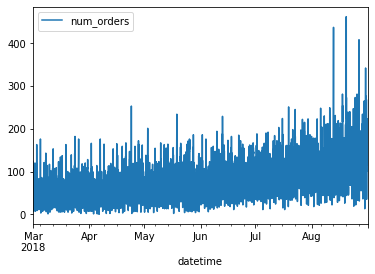

In [18]:
df.plot()

Вроде занчение в среднем увеличилось, но из за сильных значений это непонятно. Построим график со скользящим средним.

<AxesSubplot:xlabel='datetime'>

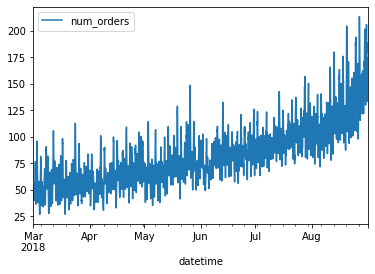

In [19]:
df_temp = df.rolling(10).mean()
df_temp.plot()

Теперь мы точно видим, что среднее увеличится, можно даже увеличить срез до 24, чтобы попадали сразу день и ночь. Это скорее сего кменьшит скачки

<AxesSubplot:xlabel='datetime'>

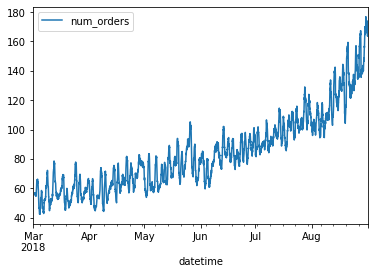

In [20]:
df_temp = df.rolling(24).mean()
df_temp.plot()

Скачки все равно остались, но так график выглядит получше, так что оставим это.

Получается количество заказов возросло почти в 3 раза за эти полгода.

### Посмотрим на тренды и сезонность:

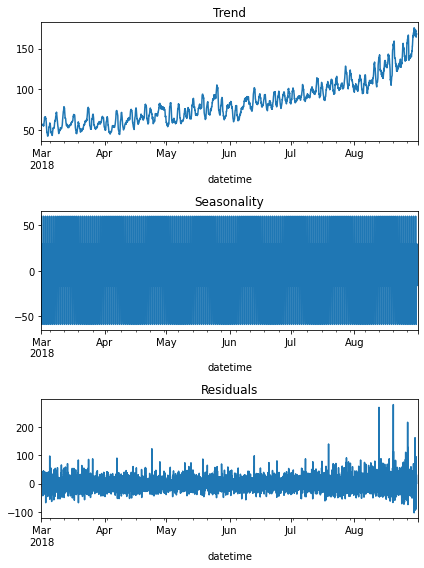

In [21]:
decomposed = seasonal_decompose(df) 
plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Тут на графике тренда явно видно то же увеличение в количестве заказов.

График с сезонностью очень не обычен и как я понимаю он скорее говорит что сезонность почти не выражена для количества заказов.

Остатки разбросаны случайно без ярковыраженных особенностей - это хороший знак что с данными все хорошо.

### Изучим изменения в соседних значениях

<AxesSubplot:xlabel='datetime'>

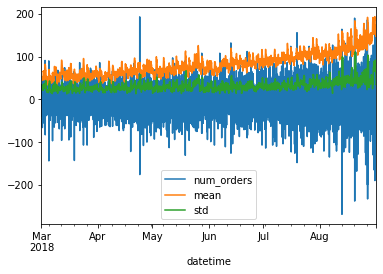

In [22]:
data_temp = df - df.shift()
data_temp['mean'] = df.rolling(15).mean()
data_temp['std'] = df.rolling(15).std()
data_temp.plot()

mean увеличивается, это обьясняется увеличением количества заказов со временем. Но еще увеличивается и std. То есть разброс изменений со временем стал выше.

### Создадим признаков для обучения модели

In [23]:
df_copy = df.copy(deep=True)

Воспользуемся функцией с автоматическим созданием признаков с параметрами:


1. Датасет
2. Число столбцов со сдвигами
3. Число для смещенного среднего

In [44]:
def make_features(data, max_lag, rolling_mean_size):
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift(1).rolling(rolling_mean_size).mean()
    


In [45]:
make_features(df_copy, 4, 4)
print(df_copy.head())

                     num_orders  month  day  dayofweek  hour  lag_1  lag_2  \
datetime                                                                     
2018-03-01 00:00:00         124      3    1          3     0    NaN    NaN   
2018-03-01 01:00:00          85      3    1          3     1  124.0    NaN   
2018-03-01 02:00:00          71      3    1          3     2   85.0  124.0   
2018-03-01 03:00:00          66      3    1          3     3   71.0   85.0   
2018-03-01 04:00:00          43      3    1          3     4   66.0   71.0   

                     lag_3  lag_4  lag_5  ...  lag_16  lag_17  lag_18  lag_19  \
datetime                                  ...                                   
2018-03-01 00:00:00    NaN    NaN    NaN  ...     NaN     NaN     NaN     NaN   
2018-03-01 01:00:00    NaN    NaN    NaN  ...     NaN     NaN     NaN     NaN   
2018-03-01 02:00:00    NaN    NaN    NaN  ...     NaN     NaN     NaN     NaN   
2018-03-01 03:00:00  124.0    NaN    NaN  ...   

Все готово для обучения модели

### Выводы по этапу:
    
1. Существует общий тренд по увеличению числа заказов.
2. Крайние значения часила заказов это 0 и 462.
3. Определенной сезонности не обнаружено.

## Обучение

### Линейная регрессия 

Создадим пайплайн по подготовке данных (хорошо бы сюда засунь перебор параметров для фукнции с созданинием толбцов, но я не знаю как)

In [46]:
tscv = TimeSeriesSplit(n_splits=5)

In [47]:
df_copy = df.copy(deep=True)
make_features(df_copy, 1, 1)
X_cat_col = ['day', 'dayofweek', 'hour']
X_num_col = df_copy.columns.drop(X_cat_col)
X_num_col = X_num_col.drop('num_orders')

In [48]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), 
        # В наших данных пропусков нет, но это может пригодится в дальнейшем для других данных.
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
 )

# Порядковых данных у нас нет

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, X_cat_col),
        ('num', MinMaxScaler(), X_num_col)
    ], 
    remainder='passthrough'
)

Начнем с линейной регрессии

In [49]:
%%time
pipe_linear = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LogisticRegression(random_state=RANDOM_STATE))
    ]
)

param_grid_linear = [
    {
        'models': [LogisticRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

grid_search_linear = GridSearchCV(
    pipe_linear, 
    param_grid=param_grid_linear, 
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

CPU times: user 59 µs, sys: 43 µs, total: 102 µs
Wall time: 106 µs


In [50]:
warnings.filterwarnings('ignore') 
# уберем предупреждения на блок, тк он не может закодировать какой то несуществующий столбец

best_params = 0
best_score = 1000
for i in range(1, 25):
    for m in range(5, 31, 5):
        df_copy = df.copy(deep=True)
        make_features(df_copy, i, m)
        X_cat_col = ['day', 'dayofweek', 'hour']
# по хорошему номер месяца это тоже категориальные данные, но тк в данном случае отрезок меньше года, 
# то изменение месяца будем показывать изменение во времени.
        X_num_col = df_copy.columns.drop(X_cat_col)
        X_num_col = X_num_col.drop('num_orders')
        
        
        data_preprocessor = ColumnTransformer(
            [
                ('ohe', ohe_pipe, X_cat_col),
                ('num', MinMaxScaler(), X_num_col)
            ], 
            remainder='passthrough'
        )
        
        
        train, test = train_test_split(df_copy, shuffle=False, test_size=0.1)
        train = train.dropna()
        
        X_train = train.drop(columns=['num_orders'])
        y_train = train['num_orders']
        X_test = test.drop(columns=['num_orders'])
        y_test = test['num_orders']
        grid_search_linear.fit(X_train, y_train)
        if grid_search_linear.best_score_ * -1 < best_score:
            best_score = grid_search_linear.best_score_ * -1
            best_params = [i, m]
            
warnings.filterwarnings('default') 
print(best_score)
print(best_params)


25.36569617510662
[24, 30]


In [51]:
df_linear = df.copy(deep=True)
make_features(df_linear, 24, 30)
X_cat_col = ['day', 'dayofweek', 'hour']
X_num_col = df_linear.columns.drop(X_cat_col)
X_num_col = X_num_col.drop('num_orders')

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, X_cat_col),
        ('num', MinMaxScaler(), X_num_col)
    ], 
    remainder='passthrough'
)
        
        
model_linear = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LinearRegression())
    ]
)

        
train, test = train_test_split(df_linear, shuffle=False, test_size=0.1)
train = train.dropna()

X_train = train.drop(columns=['num_orders'])
y_train = train['num_orders']
X_test = test.drop(columns=['num_orders'])
y_test = test['num_orders']

In [52]:
%%time 

model_linear.fit(X_train, y_train)

CPU times: user 44.7 ms, sys: 42.1 ms, total: 86.8 ms
Wall time: 40.8 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['day', 'dayofweek', 'hour']),
                                                 ('num', MinMaxScaler(),
                                                  Index(['month', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7',
       'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14',
       'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21',
       'lag_22', 'lag_23', 'lag_24', 'rolling_mean'],
      dtype='object'))])),
                ('models', LinearRegression())])

In [53]:
%%time 

linear_pred_train = model_linear.predict(X_train)

CPU times: user 10.5 ms, sys: 2.56 ms, total: 13.1 ms
Wall time: 10.2 ms


In [54]:
sqrt(mean_squared_error(y_train, linear_pred_train))

22.52893247158165

Модель линейной регрессии с правильными параметрами для датафрейма получила rmse=22.5 на тренировочной выборке. Это подходит по нашим критериям.

Теперь посмотрим на дерево регрессии.

### Дерево регрессии

Для удобства параметры таблицы оставим такими же 24 и 30. Так как они показали лучший результат на линейной модели, а их перебор вместе с перебором гиперпараметрами дерева будет очень долгим.

В таком случае X_train, X_test и тп уже готовы.

In [79]:
%%time
def objective(trial):
    
    max_depth=trial.suggest_int("max_depth", 2, 10)
    max_features=trial.suggest_int("max_features", 2, 10)
    min_samples_leaf=trial.suggest_int("min_samples_leaf", 2, 10)
    min_samples_split=trial.suggest_int("min_samples_split", 2, 10)
    # максимальные параметры ставим небольшыми, чтобы не произошло переобучения
    estimator=DecisionTreeRegressor(max_depth=max_depth, max_features=max_features, min_samples_leaf=min_samples_leaf, \
                                   min_samples_split=min_samples_split, random_state=RANDOM_STATE)

    pipeline = make_pipeline(data_preprocessor, estimator)

    
    score = cross_val_score(pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=tscv)
    rmse = score.mean()
    return rmse

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=300)

print(study.best_trial) 

[I 2024-01-01 11:26:07,534] A new study created in memory with name: no-name-cb4b140a-d054-4d96-bcd7-f77f2fd7ae3d
Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
[I 2024-01-01 11:26:07,655] Trial 0 finished with value: -33.85852842613175 and parameters: {'max_depth': 9, 'max_features': 5, 'min_samples_leaf': 6, 'min_samples_split': 5}. Best is trial 0 with value: -33.85852842613175.
Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
[I 2024-01-01 11:26:07,772] Trial 1 finished with value: -34.033516990064314 and parameters: {'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}. Best is trial 0 with value: -33.85852842613175.
Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
[I 2024-01-01 11:26:07,902] Trial 2 finished with value: -32.55772011145113 and parameters: {'max_dep

FrozenTrial(number=45, state=TrialState.COMPLETE, values=[-30.48024172547441], datetime_start=datetime.datetime(2024, 1, 1, 11, 26, 13, 713026), datetime_complete=datetime.datetime(2024, 1, 1, 11, 26, 13, 855434), params={'max_depth': 8, 'max_features': 9, 'min_samples_leaf': 6, 'min_samples_split': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=2, step=1), 'max_features': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=45, value=None)
CPU times: user 44.7 s, sys: 922 ms, total: 45.6 s
Wall time: 46.6 s


За 300 циклов модель постаралась найти лучшие гиперпараметры для дерева.

In [74]:
study.best_trial.params

{'max_depth': 9,
 'max_features': 8,
 'min_samples_leaf': 8,
 'min_samples_split': 4}

In [75]:
model_optuna = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth = 9, \
                                         max_features = 8, min_samples_leaf = 8, \
                                         min_samples_split = 4))
    ]
)

In [76]:
%%time
model_optuna.fit(X_train, y_train)

CPU times: user 22.8 ms, sys: 2.31 ms, total: 25.2 ms
Wall time: 23.2 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['day', 'dayofweek', 'hour']),
                                                 ('num', MinMaxScaler(),
                                                  Index(['month', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7',
       'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14',
       'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21',
       'lag_22', 'lag_23', 'lag_24', 'rolling_mean'],
      dtype='object'))])),
                ('models',
                 DecisionTreeRegressor(max_depth=9, max_features=8,
                                       min_samples_leaf=8, min_samples_split=4,
                                       random_state=42))])

In [77]:
%%time
optuna_pred_train = model_optuna.predict(X_train)

CPU times: user 12 ms, sys: 205 µs, total: 12.2 ms
Wall time: 10.8 ms


In [78]:
%%time
sqrt(mean_squared_error(y_train, optuna_pred_train))

CPU times: user 1.38 ms, sys: 824 µs, total: 2.21 ms
Wall time: 1.56 ms


25.03861823756026

Дерево регрессии тоже показало результат похуже линейной регрессии. rmse = 25 на тренировочной выборке. Тестовые данные будем проверять на линейной регрессии.

### Выводы по этапу:


1. Лучшие параметры для датасета это 24 и 30.
2. Линейная регрессия получила rmse=22.5 на тренировочной выборке. Также ее обучения и тренировка заняли сильно менее секунды.
3. Дерево регрессии получило rmse = 25 на тренировочной выборке. Обучение и тренировка тоже произошли сильно менее секунды.
4. Линейнай регрессия показала лучший результат, так что проверим тестовые данные на ней.

## Тестирование

In [80]:
linear_pred_test = model_linear.predict(X_test)

In [81]:
sqrt(mean_squared_error(y_test, linear_pred_test))

45.343763546334536

rmse = 45.3 это удовлетворяет требуемому порогу. Посмотрим на грфики скользящего среднего.

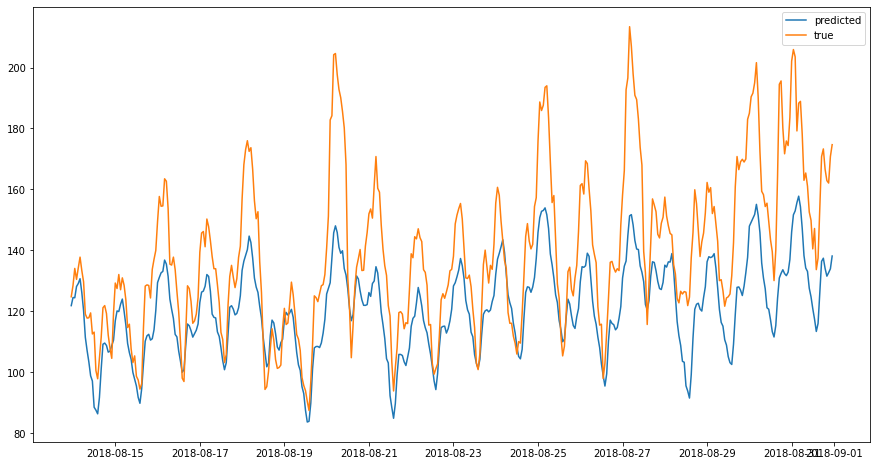

In [122]:
linear_pred_test = pd.Series(data=linear_pred_test, index=y_test.index)
plt.figure(figsize=(15, 8))
plt.plot(linear_pred_test.rolling(10).mean(), label= 'predicted')
plt.plot(y_test.rolling(10).mean(), label= 'true')
plt.legend()

Предсказанные значения не угадывают пики настоящих значений.

## Выводы:

1. За данный период существует общий тренд по увеличению числа заказов.
2. Определенной сезонности не обнаружено.
3. Линейная регрессия получила rmse = 22.5 на тренировочной выборке. Также ее обучения и тренировка заняли сильно менее секунды.
4. Дерево регрессии получило rmse = 25 на тренировочной выборке. Обучение и тренировка тоже произошли сильно менее секунды.
5. Линейная регрессия полила на тренировочной выборке rmse = 45.3. Что удовлетворяет поставленной задаче.
6. Линейная регрессия с данными параметрами датасета рекомендована для дальнейшего использования.